In [110]:
# Comando para ignorar mensagens de alertas.
import warnings 
warnings.filterwarnings('ignore')

# Bibliotecas para calculos matemáticos.
import numpy as np 
import pandas as pd 

# Biblioteca para carregamento do dataset.
import csv

# Algoritmos de modelagem.
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier 

# Bibliotecas para visualização de dados.
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.pylab as pylab 
import seaborn as sea
# Seleção de valores aleatórios para plotagem.
import random 


In [111]:
# Dividindo o dataset original em dois conjuntos de dados: treinamento e teste.
dataset_train = pd.read_csv("C:/Users/Desktop/train.csv")
dataset_test = pd.read_csv("C:/Users/Desktop/test.csv") 

# Acessando os dados.
dataset_train.head()
dataset_test.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [112]:
# Para que a normalização seja feita, foi criada a variável data_set_full para receber a concatenação dos dois conjuntos, 
# treinamento e teste.
dataset_full = dataset_train.append(dataset_test) 
titanic = dataset_full[ :891 ] 
del dataset_train, dataset_test 

# Imprime o tamanho da dimensão da matriz para cada dataset.
print ('Datasets:' , 'dataset_full:', dataset_full.shape, 'titanic:', titanic.shape)


Datasets: dataset_full: (1309, 12) titanic: (891, 12)


In [113]:
titanic.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

In [114]:
# Permite mostrar os tipos de dados (existem algumas informações faltantes, por isso que algumas colunas não foram apresentadas).
titanic.describe()

Age        Fare       Parch  PassengerId      Pclass  \
count  714.000000  891.000000  891.000000   891.000000  891.000000   
mean    29.699118   32.204208    0.381594   446.000000    2.308642   
std     14.526497   49.693429    0.806057   257.353842    0.836071   
min      0.420000    0.000000    0.000000     1.000000    1.000000   
25%     20.125000    7.910400    0.000000   223.500000    2.000000   
50%     28.000000   14.454200    0.000000   446.000000    3.000000   
75%     38.000000   31.000000    0.000000   668.500000    3.000000   
max     80.000000  512.329200    6.000000   891.000000    3.000000   

            SibSp    Survived  
count  891.000000  891.000000  
mean     0.523008    0.383838  
std      1.102743    0.486592  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      8.000000    1.000000

In [115]:
# Função de distribuição dos dados.
def plot_distribuicao(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sea.FacetGrid(df, hue=target, aspect=4, row = row, col = col)
    facet.map(sea.kdeplot, var, shade= True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    

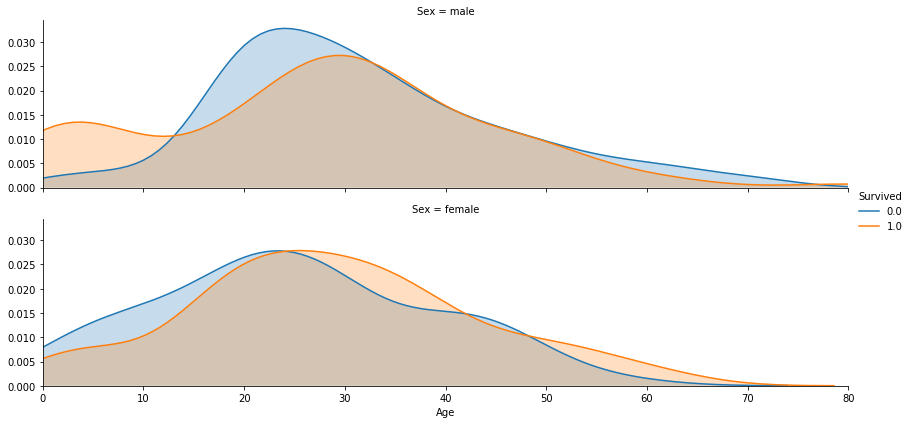

In [116]:
# Observei que mais homens abordo com idade entre 0 a 10 anos sobreviveram e mais mulheres abordo com idade entre 20 a 35 anos sobreviveram. 
plot_distribuicao(titanic, var = 'Age', target = 'Survived', row = 'Sex')


In [117]:
# Função para categorias.
def plot_categorias( df, cat, target , **kwargs ):
    row = kwargs.get('row', None )
    col = kwargs.get('col', None )
    facet = sea.FacetGrid(df, row = row, col = col )
    facet.map(sea.barplot, cat , target )
    facet.add_legend()


TypeError: not all arguments converted during string formatting

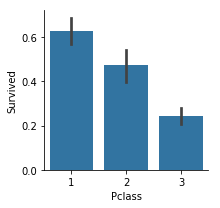

In [120]:
# Foi observado que o local de embarque e a classe que encontrava-se os passageiros não influenciaram muito no fato de 
# terem sobrevivido ou não.
plot_categorias(titanic, cat = 'Pclass', target = 'Survived')
plt.title('PROPORÇÃO DE SOBREVIVENTES POR CLASSE' % (titanic.shape[0]))


In [119]:
# Criando a variável "prioritários" que irá receber apenas mulheres e crianças.
prioritarios = (titanic['Age'] <= 40) & (titanic['Age'] > 0) | (titanic['Sex'] == 'Feminino')
prioritarios = titanic[prioritarios]
prioritarios.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

In [92]:
# Renomeando a coluna para deixar as informações claras para realizar as análises.
titanic['Survived'] = titanic['Survived'].replace([0.0, 1.0],['Não','Sim'])
titanic.head()


Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp Survived            Ticket  
0       3    male      1      Não         A/5 21171  
1       1  female      1      Sim          PC 17599  
2       3  female      0      Sim  STON/O2. 3101282  
3       1  female      1      Sim            113803  
4       3    male      0      Não            373450

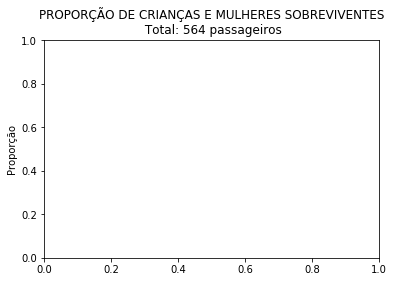

In [134]:
#prioritarios.groupby('Sex')['Survived'].apply(lambda x: np.mean(x == 'Sim')).plot(kind='bar', color=random.choice(cores), alpha=.7, figsize=(11,5), rot=0, grid=True)
plt.ylabel('Proporção')
plt.title('PROPORÇÃO DE CRIANÇAS E MULHERES SOBREVIVENTES\n Total: %s passageiros' % (prioritarios.shape[0]))
plt.show()

# Preparando os Dados.


In [123]:
# Criando a variável "sexo" irá receber a conversão binária (0 ou 1) para ser usada nos conjuntos de dados. 
sexo = pd.Series(np.where(dataset_full.Sex == "female", 1, 0 ), name = 'Sex')
sexo.head()


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int32

In [124]:
# Criando a varíavel "cabine" irá receber a conversão binária (0 ou 1) para ser usada nos conjuntos de dados. Todas as cabines com dados faltantes passam a ser preenchidos com o valor 'U'.
cabine = pd.DataFrame() 
cabine['Cabin'] = dataset_full.Cabin.fillna('U') 
cabine['Cabin'] = cabine['Cabin'].map( lambda c : c[0] )
cabine= pd.get_dummies(cabine['Cabin'], prefix = 'Cabin') 
cabine.head()

Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  \
0        0        0        0        0        0        0        0        0   
1        0        0        1        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Cabin_U  
0        1  
1        0  
2        1  
3        0  
4        1

In [125]:
# Criando a variável "classe" que irá receber a conversão binária (0 ou 1) para ser usada nos conjuntos de dados. 
classe = pd.get_dummies(dataset_full.Pclass, prefix='Pclass') 
classe.head() 

Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1

In [126]:
# Criando a variável que irá receber o DataFrame.
imputed = pd.DataFrame() 
# Preenchendo os valores ausentes de idade com a média de idade.
imputed['Age'] = dataset_full.Age.fillna(dataset_full.Age.mean())

In [127]:
# Criando a variável "embarque" que irá receber a conversão binária (0 ou 1) para ser usada nos conjuntos de dados.
embarque = pd.get_dummies(dataset_full.Embarked, prefix='Embarked')
embarque.head() 

Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1

In [128]:
# Criando a variável "familia" que irá receber (nº de pais + nº de irmãos) a abordo para ser usada nos conjuntos de dados.

familia = pd.DataFrame()
familia['FamilySize'] = dataset_full['Parch'] + dataset_full['SibSp'] + 1

# Seleção do Modelo, Treinamento e Avaliação ...

Nesta etapa serão implementados algoritmos supervisionados e não supervisionados, estudados em sala de aula. O objetivo é analisar qual dos algoritmos apresenta a acurácia melhor.



In [129]:
# Selecionando as features que foram criadas para serem usadas nos conjuntos de dados.
full = pd.concat([cabine, classe, embarque, imputed, familia], axis=1)
full.head()


Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  \
0        0        0        0        0        0        0        0        0   
1        0        0        1        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   Cabin_U  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  \
0        1         0         0         1           0           0           1   
1        0         1         0         0           1           0           0   
2        1         0         0         1           0           0           1   
3        0         1         0         0           0           0           1   
4        1         0         0         1           0           0           1   

    Age  FamilySize  
0  22.0           2  
1  38.0           2  
2  26.0           1  
3  35.0           2  
4  35.0           1

In [42]:
# Criando os conjuntos de dados: treinamento, validação e teste dos modelos.
train_valid_X = full[0:891 ]
train_valid_Y = titanic.Survived
test_X = full[891: ]
train_X, valid_X, train_Y, valid_Y = train_test_split(train_valid_X, train_valid_Y, train_size = .9)



# Implementação e Resultados dos Algoritmos ...

In [49]:
#model = LogisticRegression() 
#model = RandomForestClassifier(n_estimators=100)
#model = GradientBoostingClassifier() 
#model = KNeighborsClassifier(n_neighbors = 3)
model = MLPClassifier(learning_rate = 'adaptive', hidden_layer_sizes = 100, max_iter=30, random_state=1)

#Treinando o modelo.
model.fit(train_X, train_Y)

#Acucárica do modelo.
print ("Train: ", model.pre(train_X, train_Y))
print ("Test: ", model.score(valid_X, valid_Y))

Train:  0.6691635455680399
Test:  0.6666666666666666
